# Installing Libraries

In [4]:
!pip install tensorflow seaborn


# Mounting Content from drive to Google Colab

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Creating Zip Path

In [6]:
zip_path = '/content/drive/MyDrive/split/split.zip'


In [7]:
import zipfile
import os
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
os.listdir('/content/split')


['.DS_Store',
 'masks',
 'train',
 'test',
 '__MACOSX',
 'corrosion_features.csv',
 'unzipped',
 'split',
 'validation']

In [8]:
import os

zip_path = '/content/drive/MyDrive/split/split.zip'
os.path.exists(zip_path)
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
['train', 'validation', 'test']




['train', 'validation', 'test']

 Inside each split, create subdirectories for the classes:
  - `CORROSION`
  - `NOCORROSION`

In [9]:
import os

base_dir = '/content/split'

train_dir = os.path.join(base_dir, 'train')
train_CORROSION_dir = os.path.join(train_dir, 'CORROSION')
train_NOCORROSION_dir = os.path.join(train_dir, 'NOCORROSION')

validation_dir = os.path.join(base_dir, 'validation')
validation_CORROSION_dir = os.path.join(validation_dir, 'CORROSION')
validation_NOCORROSION_dir = os.path.join(validation_dir, 'NOCORROSION')

test_dir = os.path.join(base_dir, 'test')
test_CORROSION_dir = os.path.join(test_dir, 'CORROSION')
test_NOCORROSION_dir = os.path.join(test_dir, 'NOCORROSION')


# Printing number of images in each subdirectory

In [10]:
def num_files_in_directory(path):
    return len([file for file in os.listdir(path) if file.endswith('.jpg')])

print("[Train] CORROSION:", num_files_in_directory(train_CORROSION_dir))
print("[Train] NOCORROSION:", num_files_in_directory(train_NOCORROSION_dir))

print("[Validation] CORROSION:", num_files_in_directory(validation_CORROSION_dir))
print("[Validation] NOCORROSION:", num_files_in_directory(validation_NOCORROSION_dir))

print("[Test] CORROSION:", num_files_in_directory(test_CORROSION_dir))
print("[Test] NOCORROSION:", num_files_in_directory(test_NOCORROSION_dir))


[Train] CORROSION: 693
[Train] NOCORROSION: 580
[Validation] CORROSION: 198
[Validation] NOCORROSION: 166
[Test] CORROSION: 99
[Test] NOCORROSION: 83


In [11]:

train_dir = '/content/split/train'
train_CORROSION_dir = '/content/split/train/CORROSION/'
train_NOCORROSION_dir = '/content/split/train/NOCORROSION/'

validation_dir = '/content/split/validation'
validation_CORROSION_dir = '/content/split/validation/CORROSION/'
validation_NOCORROSION_dir = '/content/split/validation/NOCORROSION/'

test_dir = '/content/split/test'
test_CORROSION_dir = '/content/split/test/CORROSION/'
test_NOCORROSION_dir = '/content/split/test/NOCORROSION/'


In [13]:
import os

print(os.listdir('/content/split'))
print(os.listdir('/content/split/train'))
print(os.listdir('/content/split/validation'))
print(os.listdir('/content/split/test'))


['.DS_Store', 'masks', 'train', 'test', '__MACOSX', 'corrosion_features.csv', 'unzipped', 'split', 'validation']
['.DS_Store', 'NOCORROSION', 'CORROSION']
['NOCORROSION', 'CORROSION']
['.DS_Store', 'NOCORROSION', 'CORROSION']


In [14]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
from skimage import io, color


In [15]:
from google.colab import drive
import zipfile
import os

# 1. Mount your Drive
drive.mount('/content/drive')

# 2. Path to your zip file
zip_path = '/content/drive/MyDrive/split/split.zip'

# 3. Extract it into /content/split
extract_path = '/content/split'
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Files extracted successfully!")
print(os.listdir(extract_path))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Files extracted successfully!
['.DS_Store', 'masks', 'train', 'test', '__MACOSX', 'corrosion_features.csv', 'unzipped', 'split', 'validation']


In [16]:
import os

folder = '/content/split'
print("Files in directory:")
print(os.listdir(folder))


Files in directory:
['.DS_Store', 'masks', 'train', 'test', '__MACOSX', 'corrosion_features.csv', 'unzipped', 'split', 'validation']


In [17]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/split/split.zip'
extract_dir = '/content/split/unzipped'

# Create extraction folder if not exists
os.makedirs(extract_dir, exist_ok=True)

# Unzip the contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Unzipped files to:", extract_dir)
print("Files inside:", os.listdir(extract_dir))


✅ Unzipped files to: /content/split/unzipped
Files inside: ['__MACOSX', 'split']


✅ Found image: /content/split/unzipped/split/train/NOCORROSION/501d556d36.jpg


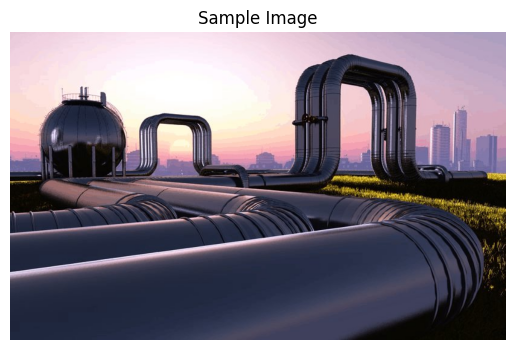

In [18]:
import os
import cv2
import matplotlib.pyplot as plt

# Root folder where files were extracted
root_dir = '/content/split/unzipped/split'

# Walk through all subdirectories and find the first image file
image_path = None
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(root, file)
            break
    if image_path:
        break

if image_path is None:
    print("⚠️ No image found in any folder.")
else:
    print("✅ Found image:", image_path)
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Sample Image')
    plt.show()


In [19]:
pip install scikit-image pandas tqdm


In [20]:
#!/usr/bin/env python3
"""
corrosion_feature_extraction.py

Walks a dataset root (train/test/validation), extracts features per image:
- edge_density (Canny)
- GLCM: contrast, homogeneity, energy, correlation
- entropy (Shannon)
- mean Lab channels (L, A, B)
- corrosion_area_fraction (Otsu + morphological cleanup)

Saves results to CSV and optionally writes overlay mask images for quick visual checks.
"""

import os
from pathlib import Path
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
from tqdm import tqdm

# -------- CONFIG --------
ROOT_DIR = Path('/content/split/unzipped/split')   # <-- change if needed
OUTPUT_CSV = Path('/content/split/corrosion_features.csv')
OUTPUT_MASK_DIR = Path('/content/split/masks')
RESIZE = (256, 256)               # standard size used for computations
GLCM_DISTANCES = [5]
GLCM_ANGLES = [0]
SAVE_MASKS = True                 # set False to skip writing overlay images
# ------------------------

def is_image_file(p: Path):
    return p.suffix.lower() in ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')

def extract_label_set_from_path(p: Path):
    """Extract label and dataset split name from path."""
    parts = [part.lower() for part in p.parts]
    setname = None
    for cand in ('train', 'test', 'validation', 'val', 'training'):
        if cand in parts:
            setname = cand
            break
    label = p.parent.name
    return label, setname or 'unknown'

def compute_features(img_bgr):
    """Compute corrosion-related features from an image."""
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, RESIZE, interpolation=cv2.INTER_AREA)
    gray_eq = cv2.equalizeHist(gray)

    edges = cv2.Canny(gray_eq, 100, 200)
    edge_density = np.count_nonzero(edges) / edges.size

    img_for_glcm = gray_eq.astype(np.uint8)
    glcm = graycomatrix(
        img_for_glcm,
        distances=GLCM_DISTANCES,
        angles=GLCM_ANGLES,
        levels=256,
        symmetric=True,
        normed=True
    )
    contrast = float(graycoprops(glcm, 'contrast')[0, 0])
    homogeneity = float(graycoprops(glcm, 'homogeneity')[0, 0])
    energy = float(graycoprops(glcm, 'energy')[0, 0])
    correlation = float(graycoprops(glcm, 'correlation')[0, 0])

    entropy = float(shannon_entropy(img_for_glcm))

    lab = cv2.cvtColor(cv2.resize(img_bgr, RESIZE, interpolation=cv2.INTER_AREA), cv2.COLOR_BGR2LAB)
    mean_L = float(np.mean(lab[:, :, 0]))
    mean_A = float(np.mean(lab[:, :, 1]))
    mean_B = float(np.mean(lab[:, :, 2]))

    _, thresh_img = cv2.threshold(img_for_glcm, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    thresh_clean = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, kernel, iterations=1)
    corrosion_area_fraction = float(np.count_nonzero(thresh_clean == 255) / thresh_clean.size)

    return {
        'edge_density': edge_density,
        'contrast': contrast,
        'homogeneity': homogeneity,
        'energy': energy,
        'correlation': correlation,
        'entropy': entropy,
        'mean_L': mean_L,
        'mean_A': mean_A,
        'mean_B': mean_B,
        'corrosion_area_fraction': corrosion_area_fraction,
        'mask': thresh_clean
    }

def main(root_dir=ROOT_DIR, out_csv=OUTPUT_CSV, save_masks=SAVE_MASKS, out_mask_dir=OUTPUT_MASK_DIR):
    root_dir = Path(root_dir)
    if not root_dir.exists():
        raise FileNotFoundError(f"Root dir not found: {root_dir}")

    if save_masks:
        out_mask_dir = Path(out_mask_dir)
        out_mask_dir.mkdir(parents=True, exist_ok=True)

    image_paths = [p for p in root_dir.rglob('*') if p.is_file() and is_image_file(p)]
    print(f"Found {len(image_paths)} images under {root_dir}")

    features_rows = []
    for p in tqdm(sorted(image_paths)):
        try:
            img = cv2.imread(str(p))
            if img is None:
                print("Warning: could not read", p)
                continue

            feats = compute_features(img)
            label, setname = extract_label_set_from_path(p)

            row = {
                'file_path': str(p),
                'set': setname,
                'label': label,
                'edge_density': feats['edge_density'],
                'contrast': feats['contrast'],
                'homogeneity': feats['homogeneity'],
                'energy': feats['energy'],
                'correlation': feats['correlation'],
                'entropy': feats['entropy'],
                'mean_L': feats['mean_L'],
                'mean_A': feats['mean_A'],
                'mean_B': feats['mean_B'],
                'corrosion_area_fraction': feats['corrosion_area_fraction']
            }
            features_rows.append(row)

            if save_masks:
                mask = feats['mask']
                resized_img = cv2.resize(img, RESIZE, interpolation=cv2.INTER_AREA)
                mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
                overlay = cv2.addWeighted(resized_img, 0.7, mask_rgb, 0.3, 0)
                out_name = out_mask_dir / f"{p.stem}_overlay.png"
                cv2.imwrite(str(out_name), overlay)

        except Exception as e:
            print(f"Error processing {p}: {e}")

    df = pd.DataFrame(features_rows)
    df.to_csv(str(out_csv), index=False)
    print(f"Saved features to {out_csv}")
    print(df.head())
    return df

if __name__ == "__main__":
    main()

Found 1819 images under /content/split/unzipped/split


100%|██████████| 1819/1819 [01:48<00:00, 16.79it/s]

Saved features to /content/split/corrosion_features.csv
                                           file_path   set      label  \
0  /content/split/unzipped/split/test/CORROSION/0...  test  CORROSION   
1  /content/split/unzipped/split/test/CORROSION/0...  test  CORROSION   
2  /content/split/unzipped/split/test/CORROSION/0...  test  CORROSION   
3  /content/split/unzipped/split/test/CORROSION/0...  test  CORROSION   
4  /content/split/unzipped/split/test/CORROSION/0...  test  CORROSION   

   edge_density     contrast  homogeneity    energy  correlation   entropy  \
0      0.347290  5957.602216     0.032137  0.009300     0.452577  7.125399   
1      0.083115  1412.731169     0.368099  0.090808     0.875139  6.525431   
2      0.097626   907.049287     0.177772  0.048104     0.917596  7.103438   
3      0.098145  1689.293187     0.251897  0.072251     0.850202  7.080294   
4      0.161438  3891.194612     0.085118  0.015708     0.642135  6.913276   

       mean_L      mean_A      mean_

In [21]:
from google.colab import files

files.download('/content/split/corrosion_features.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
pip install --upgrade scikit-learn


In [25]:
!pip install pandas

In [28]:
import pandas as pd

# 1️⃣ Load CSV
df = pd.read_csv('/content/split/corrosion_features.csv')

# 2️⃣ Select features (X) and target (y)
X = df[['edge_density','contrast','homogeneity','energy','correlation',
        'entropy','mean_L','mean_A','mean_B']]
y = df['corrosion_area_fraction']

# 3️⃣ Ensure numeric and handle NaNs
X = X.fillna(0).astype(float)
y = y.fillna(0).astype(float)

# Now you can proceed with train/test split and model training


In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

# y_test and y_pred must be numeric
y_test_numeric = np.array(y_test, dtype=float)
y_pred_numeric = np.array(y_pred, dtype=float)

# Compute MSE
mse = mean_squared_error(y_test_numeric, y_pred_numeric)

# Compute RMSE manually
rmse = np.sqrt(mse)

print("R2 score:", r2_score(y_test_numeric, y_pred_numeric))
print("RMSE:", rmse)


R2 score: 0.850346921259117
RMSE: 0.027197573199310248


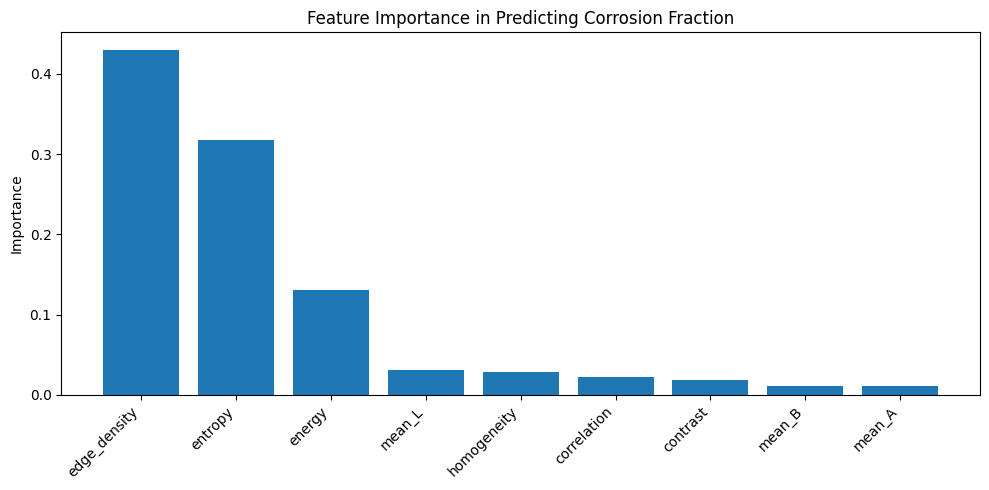

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importances from trained Random Forest
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

# Plot using matplotlib directly
plt.figure(figsize=(10,5))
plt.bar(feat_importances.index, feat_importances.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance')
plt.title('Feature Importance in Predicting Corrosion Fraction')
plt.tight_layout()
plt.show()


In [32]:
import numpy as np
import pandas as pd

# Suppose you have current timestamps for samples (or assume t_total = 100 units)
t_total = 100  # could be days, hours, etc.
f_critical = 0.8  # fraction at which metal is considered failed

# y_pred_numeric = predicted corrosion fraction from your model
# For demonstration, let's create a DataFrame
df_pred = pd.DataFrame({
    'file_path': df.loc[y_test.index, 'file_path'],
    'predicted_corrosion_fraction': y_pred_numeric
})

# Compute remaining lifetime
df_pred['remaining_lifetime'] = t_total * (f_critical - df_pred['predicted_corrosion_fraction']) / f_critical

# Clip to 0 so negative remaining life isn’t shown
df_pred['remaining_lifetime'] = df_pred['remaining_lifetime'].clip(lower=0)

# Preview
print(df_pred.head())


                                              file_path  \
1509  /content/split/unzipped/split/validation/CORRO...   
990   /content/split/unzipped/split/train/NOCORROSIO...   
135   /content/split/unzipped/split/test/NOCORROSION...   
408   /content/split/unzipped/split/train/CORROSION/...   
591   /content/split/unzipped/split/train/CORROSION/...   

      predicted_corrosion_fraction  remaining_lifetime  
1509                      0.404824           49.397039  
990                       0.466861           41.642313  
135                       0.467988           41.501493  
408                       0.384451           51.943626  
591                       0.378237           52.720375  


In [33]:
from google.colab import files

# Save to CSV
output_path = '/content/corrosion_remaining_lifetime.csv'
df_pred.to_csv(output_path, index=False)

# Download to your local machine
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>